In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing

In [3]:
df = yf.Ticker('TSLA').history(period='5y', interval='1d')
df['Return'] = 100 * df['Close'].pct_change()
df.dropna(inplace=True)

Text(0.5, 1.0, 'Daily Returns Over Time')

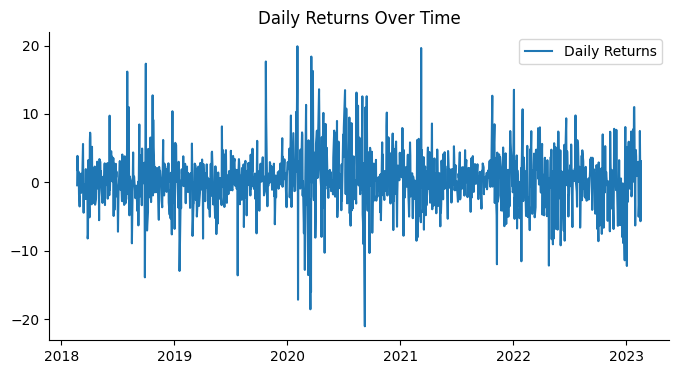

In [11]:
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

In [6]:
garch_model = arch_model(df['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
gm_result = garch_model.fit(disp='off')
print(gm_result.params)

mu          0.242439
omega       0.986534
alpha[1]    0.074440
beta[1]     0.869131
Name: params, dtype: float64


In [ ]:
gm_forecast=gm_result.forecast(horizon=5)
print(gm_forecast.variance[-1:])

Text(0.5, 1.0, 'Rolling Prediction')

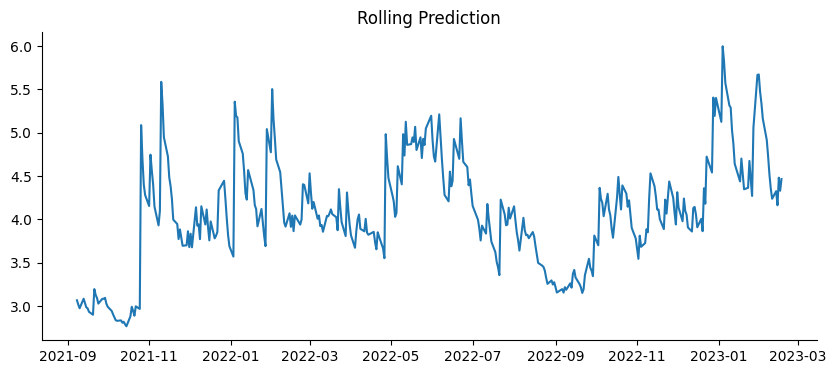

In [16]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-test_size:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

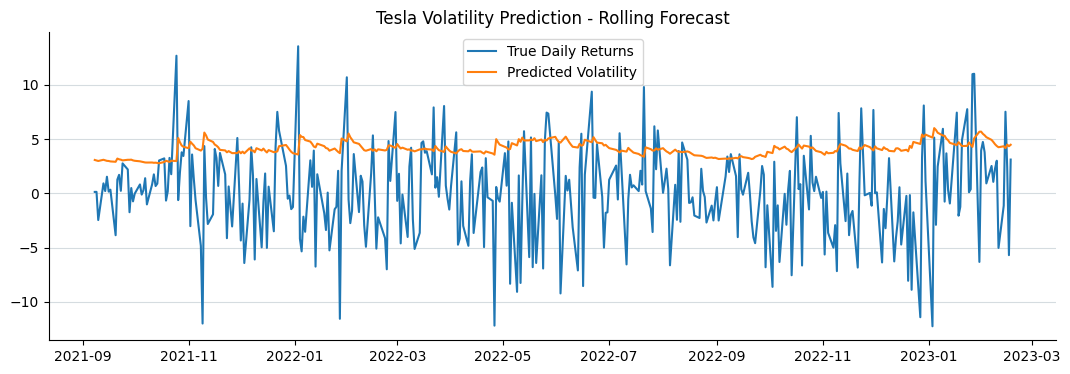

In [17]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'][-test_size:])
plt.plot(rolling_predictions)
plt.title('Tesla Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])